In [1]:
#Import Packages

import numpy as np 
import pandas as pd

In [2]:
#Load csv

train = pd.read_csv("train.tsv",sep='\t')
train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [3]:
test = pd.read_csv("test.tsv",sep='\t')
test.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [4]:
train.shape

(156060, 4)

In [5]:
test.shape

(66292, 3)

In [6]:
#Other required Packages

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemmatizer = WordNetLemmatizer()
import re

In [7]:
#Word Tokenize

reviews = train.Phrase.str.cat(sep=' ')
tokens = word_tokenize(reviews)
tokens[:10]

['A',
 'series',
 'of',
 'escapades',
 'demonstrating',
 'the',
 'adage',
 'that',
 'what',
 'is']

In [8]:
#Stop words

stop_words = set(stopwords.words('english'))
stop_words = [w for w in tokens if not w in stop_words]
stop_words[:10]

['A',
 'series',
 'escapades',
 'demonstrating',
 'adage',
 'good',
 'goose',
 'also',
 'good',
 'gander']

In [9]:
#Lowercase

lower = [each_string.lower() for each_string in stop_words]
lower[:10]

['a',
 'series',
 'escapades',
 'demonstrating',
 'adage',
 'good',
 'goose',
 'also',
 'good',
 'gander']

In [10]:
#regex - punctuation

res = [re.sub(r'[^\w\s]', '', x) for x in lower]
res[:10]

['a',
 'series',
 'escapades',
 'demonstrating',
 'adage',
 'good',
 'goose',
 'also',
 'good',
 'gander']

In [11]:
#regex - Numbers

num = [re.sub("\d+", '', x) for x in res]
num[:10]

['a',
 'series',
 'escapades',
 'demonstrating',
 'adage',
 'good',
 'goose',
 'also',
 'good',
 'gander']

In [12]:
#Stem Words
#LancasterStemmer

from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

def stem_words(words):
    
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

stem1 = stem_words(num)
stem1[:10]

['a',
 'sery',
 'escapad',
 'demonst',
 'ad',
 'good',
 'goos',
 'also',
 'good',
 'gand']

In [13]:
#PorterStemmer

def stem_words(words):
    
    stemmer = PorterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

stem2 = stem_words(num)
stem2[:10]

['a',
 'seri',
 'escapad',
 'demonstr',
 'adag',
 'good',
 'goos',
 'also',
 'good',
 'gander']

In [14]:
#Lemmatize Verbs

def lemmatize_verbs(words):
    
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

lemma = lemmatize_verbs(num)
lemma[:10]

['a',
 'series',
 'escapades',
 'demonstrate',
 'adage',
 'good',
 'goose',
 'also',
 'good',
 'gander']

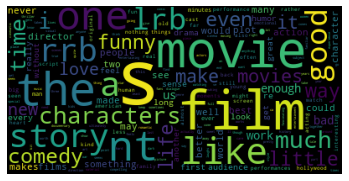

In [15]:
#Wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

frequency_dist = nltk.FreqDist(num)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]


wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()